# Predicting Practice of Exercise During

## Importing packages

In [36]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
source(here('Modules','unsupervised_learning.R'))
#install_all_packages()
load_library_packages()

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following object is masked from 'package:h2o':

    var


The following objects are masked from 'package:stats':

    cov, smooth, var




Performing PCA
Read the 1242 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 100.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 1.22 seconds (sparsity = 0.326346)!
Learning embedding...
Iteration 50: error is 57.596822 (50 iterations in 0.52 seconds)
Iteration 100: error is 57.596822 (50 iterations in 0.44 seconds)
Iteration 150: error is 57.596822 (50 iterations in 0.89 seconds)
Iteration 200: error is 57.596822 (50 iterations in 1.34 seconds)
Iteration 250: error is 57.596830 (50 iterations in 2.00 seconds)
Iteration 300: error is 2.314829 (50 iterations in 1.40 seconds)
Iteration 350: error is 1.307825 (50 iterations in 0.77 seconds)
Iteration 400: error is 1.264104 (50 iterations in 0.43 seconds)
Iteration 450: error is 1.259163 (50 iterations in 0.49 seconds)
Iteration 500: error is 1.254181 (50 iterations in 0.55 seconds)
Iteration 550: error is 1.251289 (50 iterations in 0.49 seconds)
Iteration 6

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

## Outliers

#### Outlier: Strange Dont Practice

In [37]:
pa_dataset_copy <- pa_dataset
pa_dataset_copy["outlier"] <- strange_dp
outliers_result_sdp <- outliers_checker(distances_sdp, pa_dataset_copy, "PA_practice_during")

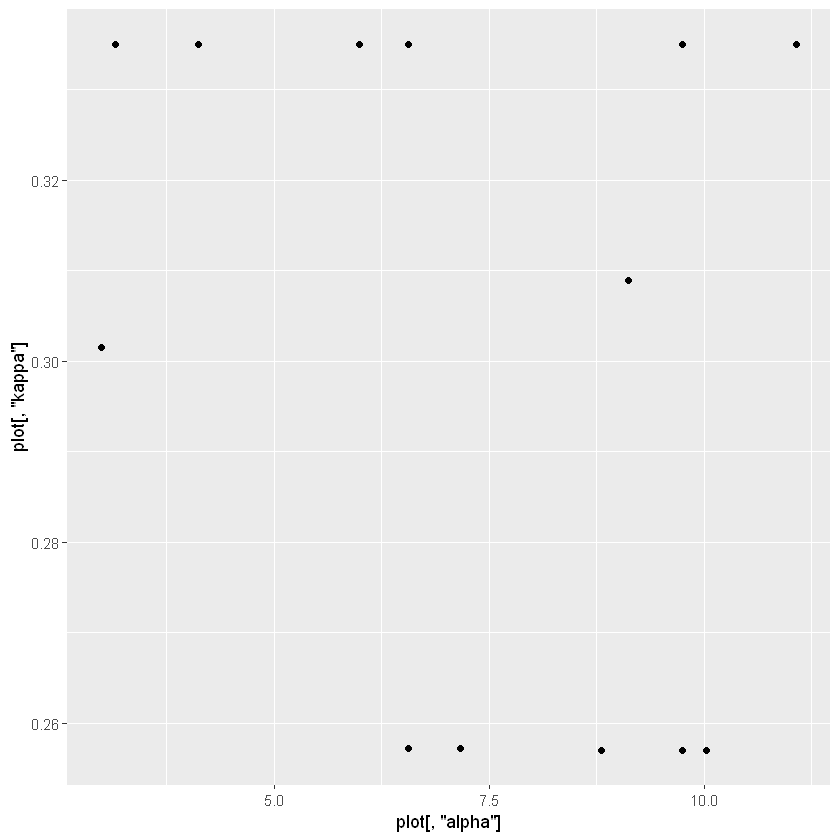

In [38]:
plot <- outliers_result_sdp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

#### Outlier: Strange Practice

In [ ]:
pa_dataset_copy <- pa_dataset
pa_dataset_copy["outlier"] <- strange_p
outliers_result_sp <- outliers_checker(distances_sp, pa_dataset_copy, "PA_practice_during")

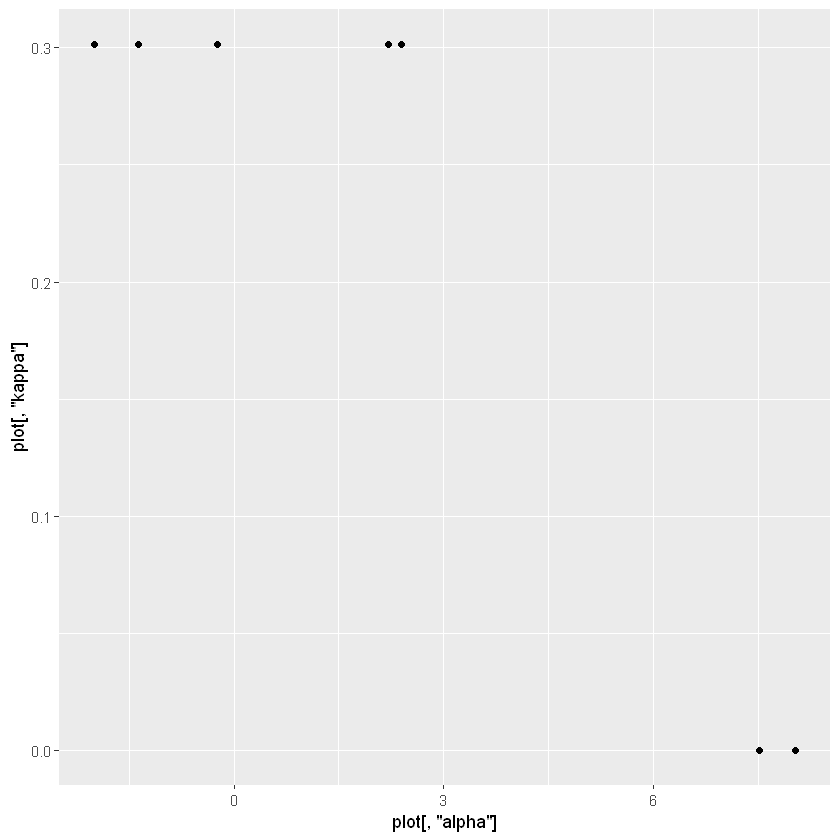

In [ ]:
plot <- outliers_result_sp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

#### New Train and Test
The outliers check in the strange dont practice showed that we should delete 1 record

In [39]:
pa_train <- outliers_result_sdp$best_model$train
pa_test <- outliers_result_sdp$best_model$test

## Models

In [ ]:
dim(pa_dataset)

[1] 1242   74

In [ ]:
table(pa_dataset[, "PA_practice_during"])


dont_practice      practice 
          346           896 

There is a majority class, we should apply data augmentation. We chose kappa metrict to optimize becouse data is unbalanced.

### Applying augmentation into the training set

In [ ]:
pa_train.aug <- data_augmentation(
    train_data=pa_train,
    yname="PA_practice_during",
    maj_class = "practice",
    min_classes = c("dont_practice"),
    ycol=match("PA_practice_during",names(pa_dataset))
)

table(pa_train.aug[, "PA_practice_during"])



dont_practice      practice 
          628           628 

### Decision Tree: Kappa metric without augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            50       43
  practice                 53      225
                                          
               Accuracy : 0.7412          
                 95% CI : (0.6935, 0.7851)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.2267          
                                          
                  Kappa : 0.335           
                                          
 Mcnemar's Test P-Value : 0.3583          
                                          
            Sensitivity : 0.4854          
            Specificity : 0.8396          
         Pos Pred Value : 0.5376          
         Neg Pred Value : 0.8094          
              Precision : 0.5376          
                 Recall : 0.4854          
                     F1 : 0.5102          
             Prevalence : 0.2776          
         Detection Rate : 0.1348          
   Detec

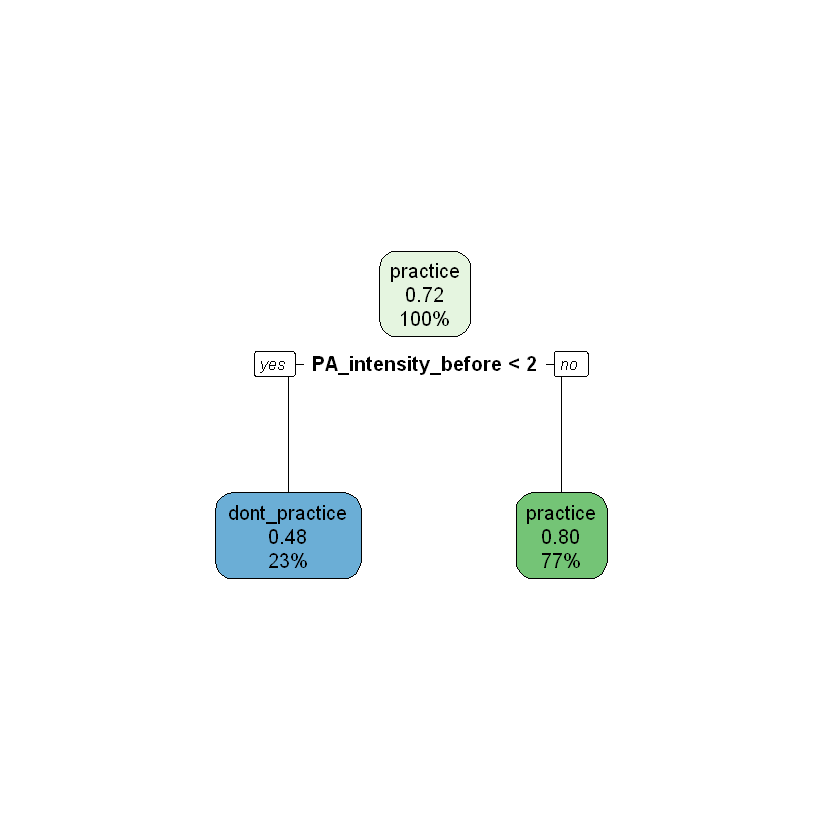

In [5]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = pa_train,
    test_data= pa_test,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)

rpart.plot(model$result$finalModel)



### Decision Tree: Accuracy metric with augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            47       59
  practice                 56      209
                                          
               Accuracy : 0.69            
                 95% CI : (0.6402, 0.7368)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.9251          
                                          
                  Kappa : 0.2341          
                                          
 Mcnemar's Test P-Value : 0.8521          
                                          
            Sensitivity : 0.4563          
            Specificity : 0.7799          
         Pos Pred Value : 0.4434          
         Neg Pred Value : 0.7887          
             Prevalence : 0.2776          
         Detection Rate : 0.1267          
   Detection Prevalence : 0.2857          
      Balanced Accuracy : 0.6181          
                                          
       '

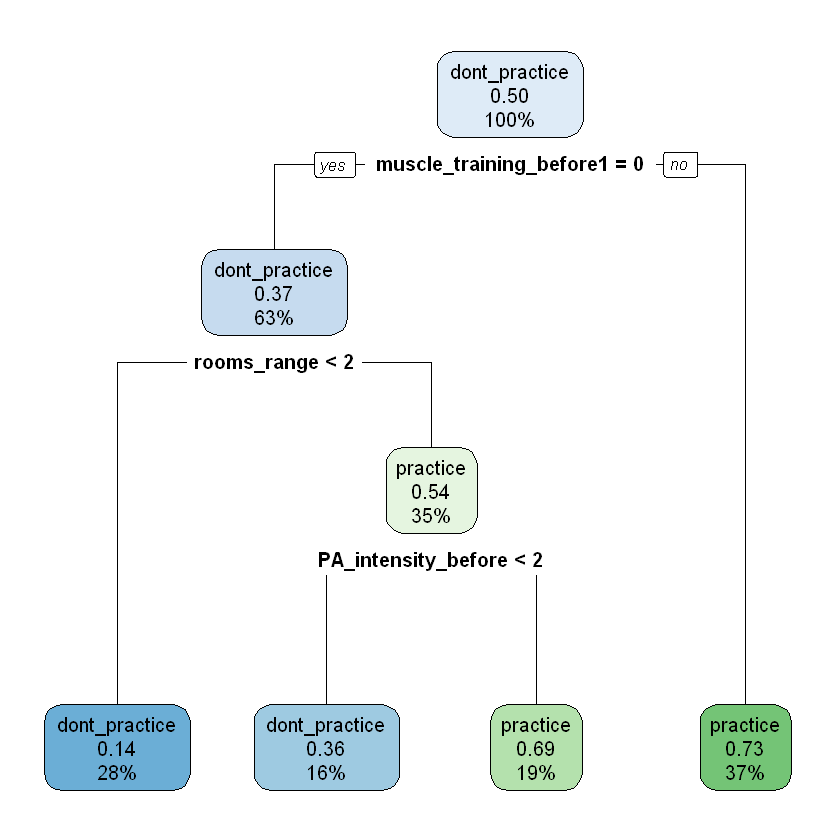

In [ ]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv"),
    train_data = pa_train.aug,
    test_data=pa_test,
    yname="PA_practice_during",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)

### RF: Kappa metric without augmentation

In [ ]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = pa_train,
    test_data=pa_test,
    yname="PA_practice_during",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            44       28
  practice                 59      240
                                         
               Accuracy : 0.7655         
                 95% CI : (0.719, 0.8077)
    No Information Rate : 0.7224         
    P-Value [Acc > NIR] : 0.034526       
                                         
                  Kappa : 0.3557         
                                         
 Mcnemar's Test P-Value : 0.001298       
                                         
            Sensitivity : 0.4272         
            Specificity : 0.8955         
         Pos Pred Value : 0.6111         
         Neg Pred Value : 0.8027         
             Prevalence : 0.2776         
         Detection Rate : 0.1186         
   Detection Prevalence : 0.1941         
      Balanced Accuracy : 0.6614         
                                         
       'Positive' Class : d

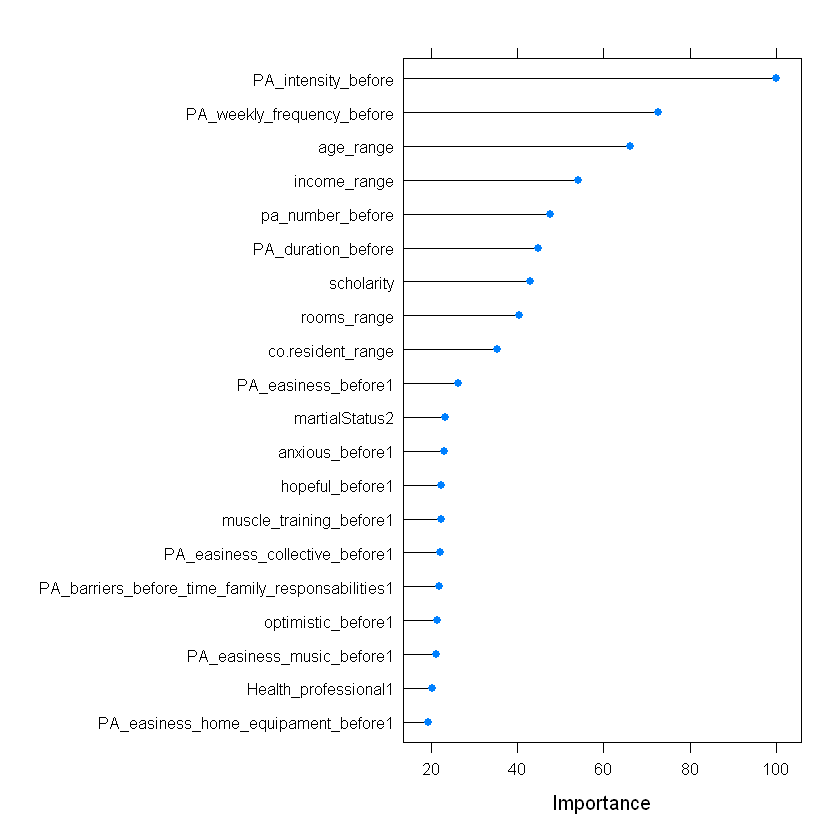

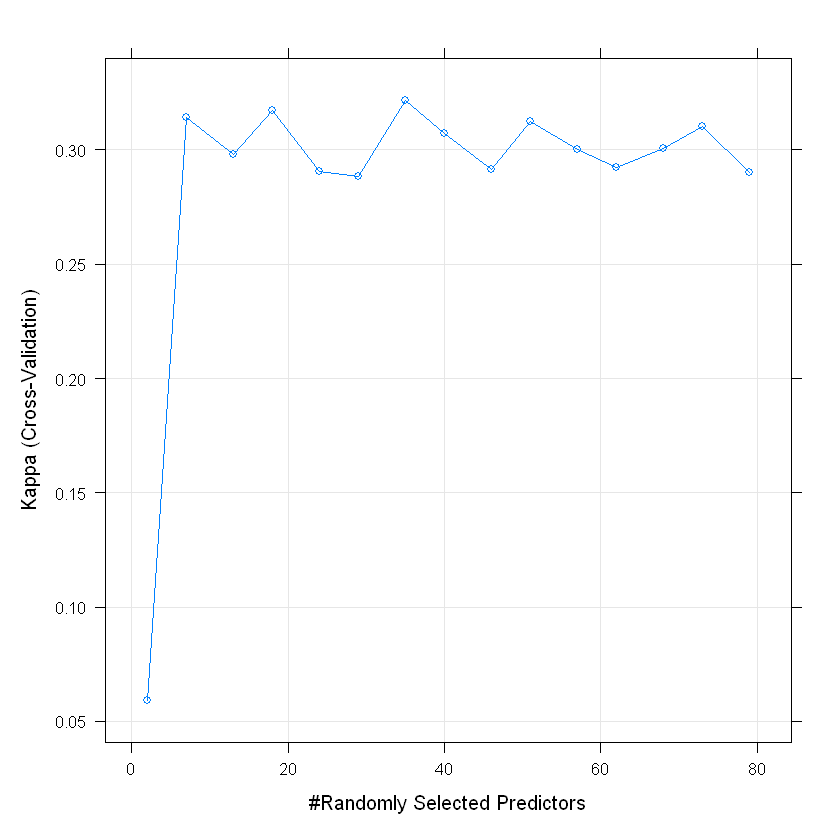

In [ ]:
plot(varImp(model$result), top=20)
plot(model$result)


### RF: Kappa metric with augmentation

In [ ]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = pa_train.aug,
    test_data=pa_test,
    yname="PA_practice_during",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            46       23
  practice                 57      245
                                         
               Accuracy : 0.7844         
                 95% CI : (0.739, 0.8251)
    No Information Rate : 0.7224         
    P-Value [Acc > NIR] : 0.0038418      
                                         
                  Kappa : 0.4016         
                                         
 Mcnemar's Test P-Value : 0.0002247      
                                         
            Sensitivity : 0.4466         
            Specificity : 0.9142         
         Pos Pred Value : 0.6667         
         Neg Pred Value : 0.8113         
             Prevalence : 0.2776         
         Detection Rate : 0.1240         
   Detection Prevalence : 0.1860         
      Balanced Accuracy : 0.6804         
                                         
       'Positive' Class : d

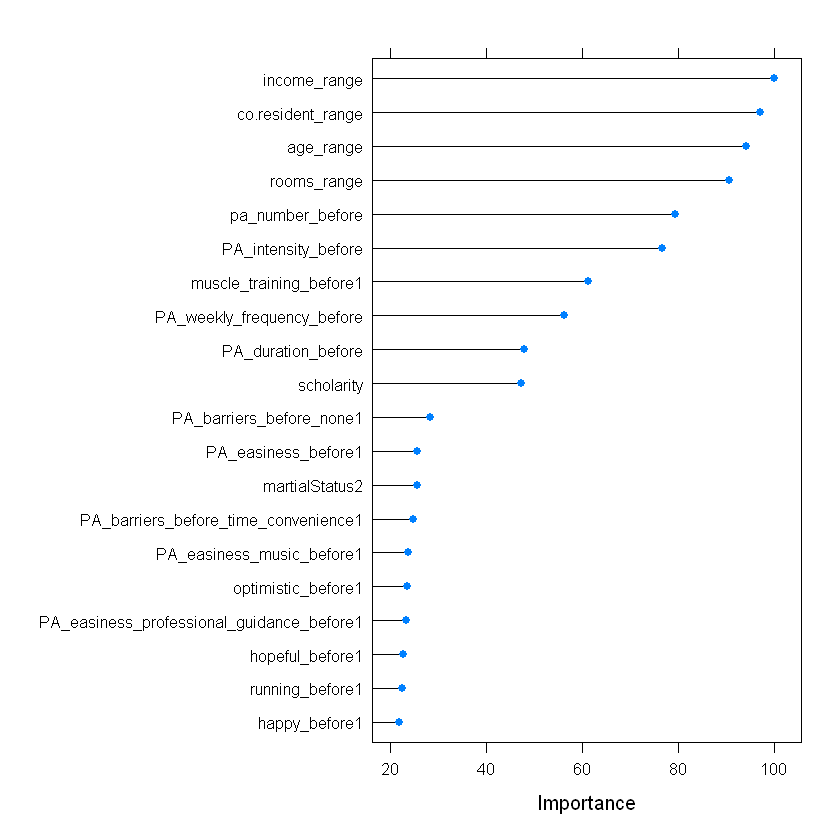

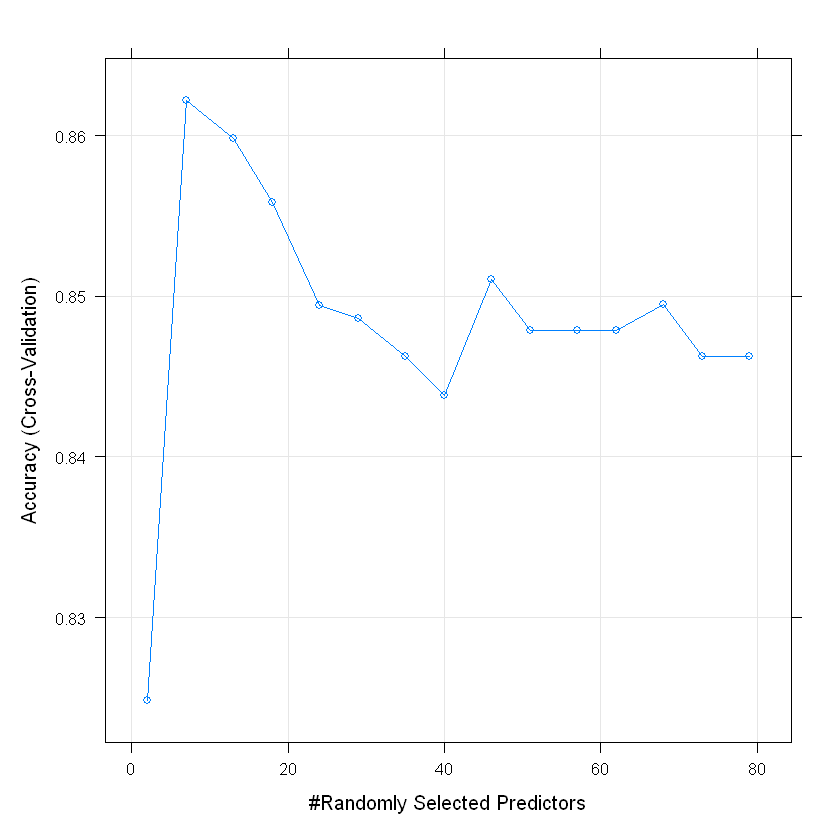

In [ ]:
plot(varImp(model$result), top=20)
plot(model$result)


In [ ]:
real <- as.numeric(factor(ts$diabetes))-1

In [62]:
source(here('Modules','modules.R'))
set.seed(2)
model <- fit_model_th(
    model_method="rpart",
    model_metric="ROC",
    trControl_func = trainControl(method = "cv",returnResamp = 'none', classProbs = TRUE,  savePredictions = TRUE,  verboseIter = FALSE, summaryFunction = twoClassSummary),
    train_data = pa_train,
    test_data=pa_test,
    yname="PA_practice_during",
    length = 3
)
# print(model$matrix)

Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Neg Pred Value'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Pos Pred Value', 'Precision', 'F1'.
"
Warning message in .fun(piece, ...):
"The following columns have